In [2]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')

# Display the first few rows of the DataFrame
display(df.head())

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# Check for missing values
print(df.isnull().sum())

# Get data types of each column
print(df.info())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [8]:
# Handle missing values: Drop rows with missing 'Rating' as this is our target variable
df.dropna(subset=['Rating'], inplace=True)

# Impute missing numerical values with the mean (Year and Duration after conversion)
# Convert 'Year' and 'Duration' to numeric, coercing errors
df['Year'] = df['Year'].astype(str).str.strip('()')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


# Impute missing values in 'Year' and 'Duration' with their respective means
df['Year'] = df['Year'].fillna(df['Year'].mean())
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())

# For categorical features, impute missing values with a placeholder like 'Unknown'
categorical_cols = ['Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Convert 'Votes' to numeric, coercing errors
df['Votes'] = df['Votes'].astype(str).str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Impute missing values in 'Votes' after conversion with the mean
df['Votes'] = df['Votes'].fillna(df['Votes'].mean())

# Display the number of remaining missing values to confirm
print(df.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [5]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,Name,Year,Duration,Rating,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family",...,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,#Gadhvi (He thought he was Gandhi),2019,109.0,7.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019,110.0,4.4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997,147.0,4.7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,2005,142.0,7.4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,2012,82.0,5.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(['Name', 'Rating'], axis=1)  # Drop 'Name' and the target variable 'Rating'
y = df_encoded['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6335, 14093)
Shape of X_test: (1584, 14093)
Shape of y_train: (6335,)
Shape of y_test: (1584,)


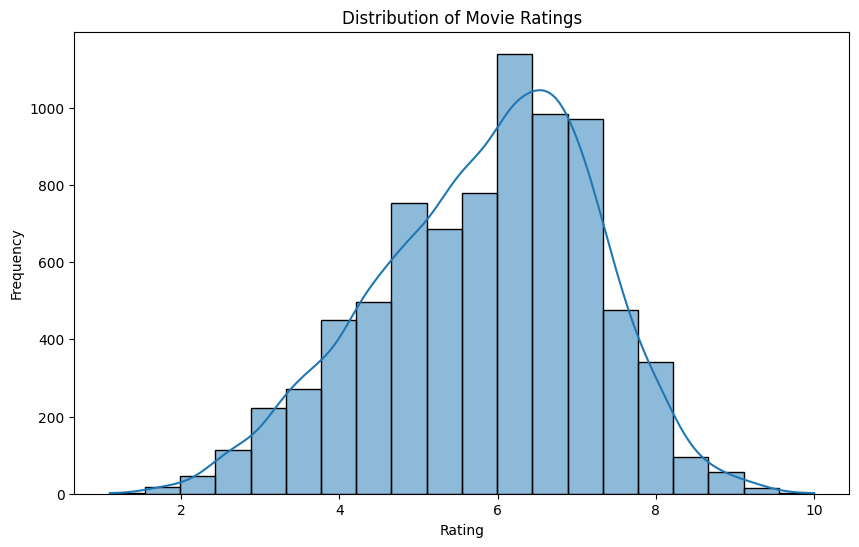

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

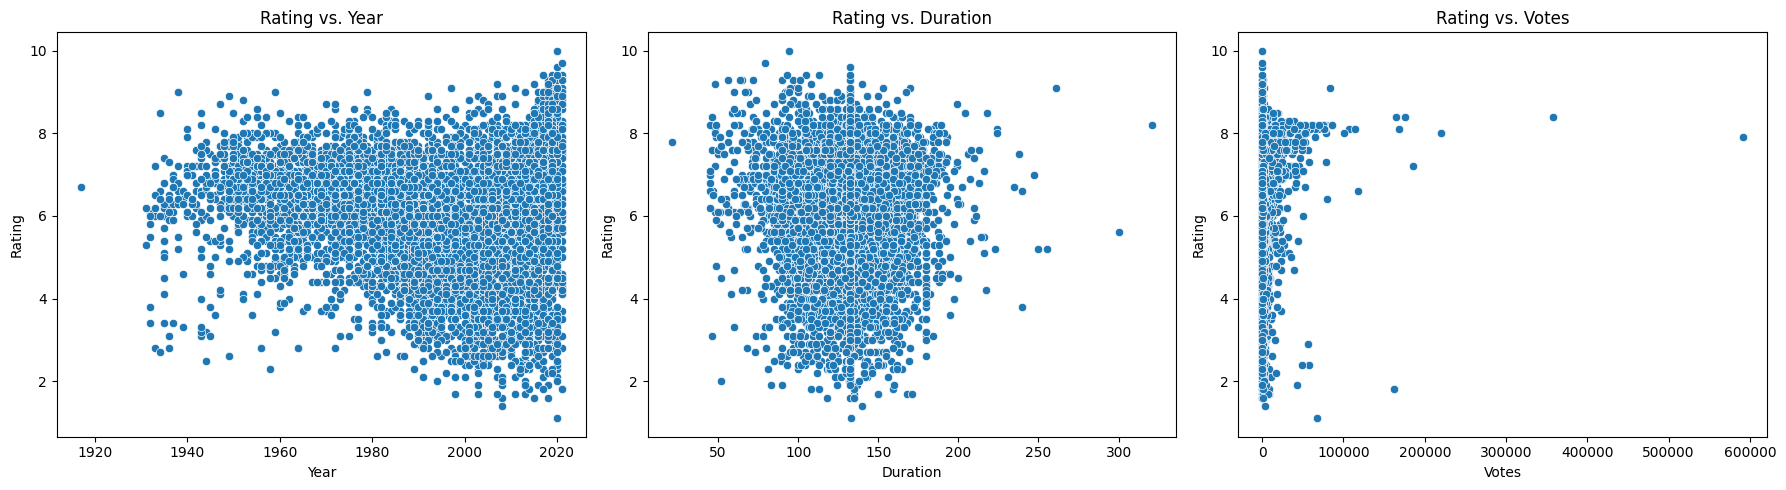

In [12]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Rating', data=df)
plt.title('Rating vs. Year')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Rating vs. Duration')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Rating vs. Votes')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0) # You can experiment with different alpha values
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")

Ridge Regression Mean Squared Error: 1.4354201302072762
Ridge Regression R-squared: 0.22791389503286286
